In [1]:
#array handling and plotting
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#to suppress the warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import warnings
warnings.filterwarnings('ignore')
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

In [3]:
from keras.datasets import mnist #importing the dataset
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras import layers
from keras.utils import np_utils

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analyzing the dataset

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
print("shape of X_train is : ", X_train.shape)
print("shape of y_train is : ", y_train.shape)

print("shape of X_test is : ", X_test.shape)
print("shape of y_test is : ", y_test.shape)

shape of X_train is :  (60000, 28, 28)
shape of y_train is :  (60000,)
shape of X_test is :  (10000, 28, 28)
shape of y_test is :  (10000,)


In [7]:
print("X_train is between ", X_train.min()," and ",X_train.max(), " // type : ", X_train.dtype)
print("y_train is between ", y_train.min()," and ",y_train.max(), " // type : ", y_train.dtype)

X_train is between  0  and  255  // type :  uint8
y_train is between  0  and  9  // type :  uint8


In [8]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

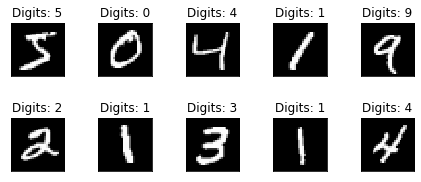

In [9]:
for i in range(10):
    plt.subplot(3, 5, i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digits: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])

In [10]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784) 

In [11]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [12]:
print("shape of X_train is : ", X_train.shape)
print("shape of y_train is : ", y_train.shape)

print("shape of X_test is : ", X_test.shape)
print("shape of y_test is : ", y_test.shape)

shape of X_train is :  (60000, 784)
shape of y_train is :  (60000, 10)
shape of X_test is :  (10000, 784)
shape of y_test is :  (10000, 10)


In [13]:
print("X_train is between ", X_train.min()," and ",X_train.max(), " // type : ", X_train.dtype)
print("y_train is between ", y_train.min()," and ",y_train.max(), " // type : ", y_train.dtype)

X_train is between  0  and  255  // type :  uint8
y_train is between  0.0  and  1.0  // type :  float32


In [14]:
#number of each digit in the train set
tempo=y_train.tolist()
counter_train=np.zeros((10))
element=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
for i in range (10):
    element[i]=1.0
    counter_train[i]=tempo.count(element)
    element[i]=0.0

print(counter_train)

#number of each digit in the test set
tempo=y_test.tolist()
counter_test=np.zeros((10))
element=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
for i in range (10):
    element[i]=1.0
    counter_test[i]=tempo.count(element)
    element[i]=0.0

print(counter_test)

[5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.]
[ 980. 1135. 1032. 1010.  982.  892.  958. 1028.  974. 1009.]


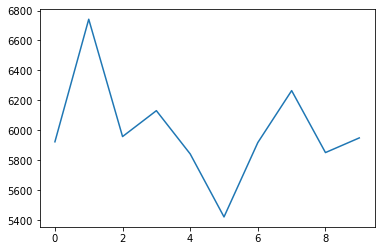

In [15]:
X=[0,1,2,3,4,5,6,7,8,9]
plt.plot(X,counter_train)

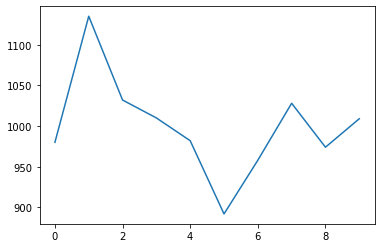

In [16]:
X=[0,1,2,3,4,5,6,7,8,9]
plt.plot(X,counter_test)

# First model

In [17]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28* 28, )))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))

model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')

In [18]:
history = model.fit(X_train, y_train,  validation_data=(X_test, y_test), batch_size=128, epochs= 40, verbose=2)

Epoch 1/40
469/469 - 29s - loss: 3.0095 - acc: 0.8670 - val_loss: 0.3395 - val_acc: 0.9445
Epoch 2/40
469/469 - 5s - loss: 0.4434 - acc: 0.9213 - val_loss: 0.1832 - val_acc: 0.9517
Epoch 3/40
469/469 - 5s - loss: 0.2600 - acc: 0.9383 - val_loss: 0.1562 - val_acc: 0.9601
Epoch 4/40
469/469 - 6s - loss: 0.1962 - acc: 0.9486 - val_loss: 0.1299 - val_acc: 0.9649
Epoch 5/40
469/469 - 6s - loss: 0.1677 - acc: 0.9557 - val_loss: 0.1239 - val_acc: 0.9663
Epoch 6/40
469/469 - 5s - loss: 0.1557 - acc: 0.9590 - val_loss: 0.1275 - val_acc: 0.9653
Epoch 7/40
469/469 - 5s - loss: 0.1466 - acc: 0.9610 - val_loss: 0.1373 - val_acc: 0.9655
Epoch 8/40
469/469 - 5s - loss: 0.1464 - acc: 0.9606 - val_loss: 0.1249 - val_acc: 0.9653
Epoch 9/40
469/469 - 5s - loss: 0.1369 - acc: 0.9629 - val_loss: 0.1304 - val_acc: 0.9679
Epoch 10/40
469/469 - 5s - loss: 0.1435 - acc: 0.9620 - val_loss: 0.1133 - val_acc: 0.9689
Epoch 11/40
469/469 - 5s - loss: 0.1357 - acc: 0.9649 - val_loss: 0.1312 - val_acc: 0.9691
Epoch 1

In [19]:
import matplotlib.pyplot as plt
def show_acc(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    print("Train accuracy :", history.history['acc'][-1])
    print("Test accuracy  :", history.history['val_acc'][-1])
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'm', label='Testing acc')
    plt.title('Training and testing accuracy')
    plt.legend()

    plt.figure()
    
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'm', label='Testing loss')
    plt.title('Training and test loss')
    plt.legend()

    plt.show()

Train accuracy : 0.9813833236694336
Test accuracy  : 0.9772999882698059


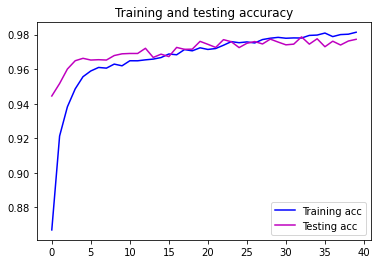

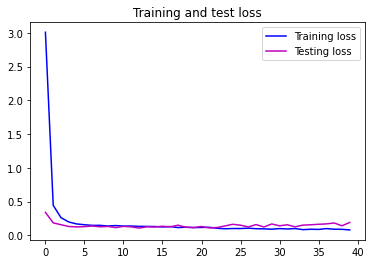

In [20]:
show_acc(history)

In [22]:
predictions = model.predict(X_test)

In [24]:
delta=0.1
predicitions_modified=np.zeros(predictions.shape)
for i in range(predictions.shape[0]):
    for j in range (predictions.shape[1]):
        if(predictions[i][j]>1-delta):
            predicitions_modified[i][j]=1

In [25]:
correct=0
incorrect=0
for i in range (len(predictions)):
    if ((predicitions_modified[i]==y_test[i]).all()):
        correct+=1
    else:
        incorrect+=1
print(correct, " predictions were correct ")
print(incorrect, " predictions were incorrect ")
print(100*correct/(correct+incorrect))

9618  predictions were correct 
382  predictions were incorrect 
96.18


In [26]:
y_test_numerical=np.argmax(y_test, axis=1)

In [27]:
predicitions_modified_numerical=np.argmax(predicitions_modified, axis=1)

In [29]:
from sklearn.metrics import confusion_matrix
confused=confusion_matrix(y_test_numerical, predicitions_modified_numerical)  

In [30]:
confused.shape

(10, 10)

In [187]:
confused

array([[ 977,    0,    0,    0,    0,    0,    2,    1,    0,    0],
       [  24, 1104,    1,    1,    1,    1,    2,    1,    0,    0],
       [  24,    0,  999,    3,    4,    0,    0,    1,    1,    0],
       [  67,    0,    0,  920,    0,   19,    0,    4,    0,    0],
       [  50,    0,    1,    1,  920,    0,    4,    1,    0,    5],
       [  18,    0,    0,    1,    0,  870,    2,    0,    1,    0],
       [  21,    1,    0,    0,    1,    4,  930,    0,    1,    0],
       [  29,    0,    8,    0,    0,    0,    0,  991,    0,    0],
       [  70,    0,    1,    1,    0,    4,    0,    3,  895,    0],
       [  91,    2,    0,    0,    3,    1,    0,    1,    0,  911]],
      dtype=int64)

In [31]:
y_train_numerical=mnist.load_data()[0][1]

In [ ]:
#Code taken from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

from sklearn import svm, datasets

classifier = svm.SVC(kernel="linear", C=0.01).fit(X_train, y_train_numerical)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
# y_test_numerical, predicitions_modified_numerical
# plt.show()

In [186]:
confused.sum(axis=1)

array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009],
      dtype=int64)

# Second model

In [22]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28* 28, )))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation="softmax"))

model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')

In [23]:
history = model.fit(X_train, y_train,  validation_data=(X_test, y_test), batch_size=128, epochs= 40, verbose=2)

Epoch 1/40
469/469 - 7s - loss: 2.5463 - acc: 0.8865 - val_loss: 0.3104 - val_acc: 0.9444
Epoch 2/40
469/469 - 5s - loss: 0.3125 - acc: 0.9383 - val_loss: 0.1983 - val_acc: 0.9550
Epoch 3/40
469/469 - 5s - loss: 0.1911 - acc: 0.9540 - val_loss: 0.1584 - val_acc: 0.9608
Epoch 4/40
469/469 - 5s - loss: 0.1473 - acc: 0.9616 - val_loss: 0.1640 - val_acc: 0.9604
Epoch 5/40
469/469 - 5s - loss: 0.1353 - acc: 0.9649 - val_loss: 0.1489 - val_acc: 0.9637
Epoch 6/40
469/469 - 5s - loss: 0.1258 - acc: 0.9668 - val_loss: 0.1501 - val_acc: 0.9673
Epoch 7/40
469/469 - 5s - loss: 0.1146 - acc: 0.9693 - val_loss: 0.1431 - val_acc: 0.9671
Epoch 8/40
469/469 - 5s - loss: 0.1146 - acc: 0.9697 - val_loss: 0.1420 - val_acc: 0.9662
Epoch 9/40
469/469 - 5s - loss: 0.1097 - acc: 0.9708 - val_loss: 0.1731 - val_acc: 0.9640
Epoch 10/40
469/469 - 5s - loss: 0.1092 - acc: 0.9706 - val_loss: 0.1500 - val_acc: 0.9670
Epoch 11/40
469/469 - 5s - loss: 0.1072 - acc: 0.9718 - val_loss: 0.1616 - val_acc: 0.9696
Epoch 12

In [24]:
import matplotlib.pyplot as plt
def show_acc(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    print("Train accuracy :", history.history['acc'][-1])
    print("Test accuracy  :", history.history['val_acc'][-1])
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'm', label='Testing acc')
    plt.title('Training and testing accuracy')
    plt.legend()

    plt.figure()
    
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'm', label='Testing loss')
    plt.title('Training and test loss')
    plt.legend()

    plt.show()

Train accuracy : 0.9872499704360962
Test accuracy  : 0.9786999821662903


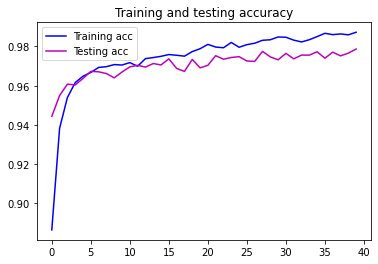

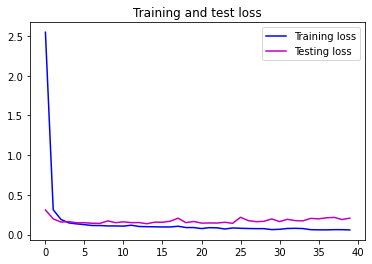

In [25]:
show_acc(history)

In [26]:
predictions = model.predict(X_test)

In [27]:
delta=0.1
predicitions_modified=np.zeros(predictions.shape)
for i in range(predictions.shape[0]):
    for j in range (predictions.shape[1]):
        if(predictions[i][j]>1-delta):
            predicitions_modified[i][j]=1

In [29]:
correct=0
incorrect=0
for i in range (len(predictions)):
    if ((predicitions_modified[i]==y_test[i]).all()):
        correct+=1
    else:
        incorrect+=1
print(correct, " predictions were correct ")
print(incorrect, " predictions were incorrect ")
print(100*correct/(correct+incorrect))

9659  predictions were correct 
341  predictions were incorrect 
96.59


# Third model

In [30]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [31]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [32]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [33]:
model = Sequential()
model.add(Dense(450, activation='relu', input_shape=(28* 28, )))
model.add(Dropout(0.1))
model.add(Dense(350, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation="softmax"))

model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')

In [34]:
history = model.fit(X_train, y_train,  validation_data=(X_test, y_test), batch_size=128, epochs= 40, verbose=2)

Epoch 1/40
469/469 - 6s - loss: 2.6422 - acc: 0.8772 - val_loss: 0.3307 - val_acc: 0.9393
Epoch 2/40
469/469 - 4s - loss: 0.3451 - acc: 0.9270 - val_loss: 0.2116 - val_acc: 0.9493
Epoch 3/40
469/469 - 4s - loss: 0.2096 - acc: 0.9482 - val_loss: 0.1697 - val_acc: 0.9558
Epoch 4/40
469/469 - 4s - loss: 0.1696 - acc: 0.9549 - val_loss: 0.1669 - val_acc: 0.9603
Epoch 5/40
469/469 - 4s - loss: 0.1418 - acc: 0.9610 - val_loss: 0.1465 - val_acc: 0.9638
Epoch 6/40
469/469 - 4s - loss: 0.1240 - acc: 0.9653 - val_loss: 0.1527 - val_acc: 0.9639
Epoch 7/40
469/469 - 4s - loss: 0.1183 - acc: 0.9661 - val_loss: 0.1554 - val_acc: 0.9646
Epoch 8/40
469/469 - 4s - loss: 0.1202 - acc: 0.9677 - val_loss: 0.1435 - val_acc: 0.9659
Epoch 9/40
469/469 - 4s - loss: 0.1143 - acc: 0.9700 - val_loss: 0.1320 - val_acc: 0.9681
Epoch 10/40
469/469 - 5s - loss: 0.1033 - acc: 0.9714 - val_loss: 0.1277 - val_acc: 0.9700
Epoch 11/40
469/469 - 5s - loss: 0.1060 - acc: 0.9715 - val_loss: 0.1822 - val_acc: 0.9652
Epoch 12

In [35]:
import matplotlib.pyplot as plt
def show_acc(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    print("Train accuracy :", history.history['acc'][-1])
    print("Test accuracy  :", history.history['val_acc'][-1])
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'm', label='Testing acc')
    plt.title('Training and testing accuracy')
    plt.legend()

    plt.figure()
    
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'm', label='Testing loss')
    plt.title('Training and test loss')
    plt.legend()

    plt.show()

Train accuracy : 0.9868166446685791
Test accuracy  : 0.9779000282287598


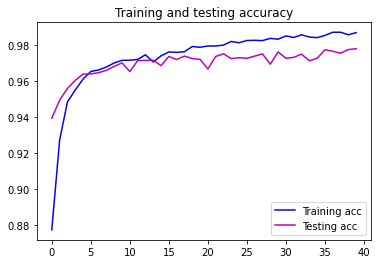

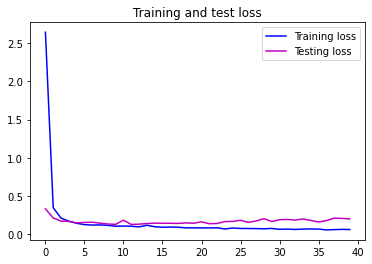

In [40]:
show_acc(history)

In [44]:
predictions = model.predict(X_test)

In [45]:
delta=0.1
predicitions_modified=np.zeros(predictions.shape)
for i in range(predictions.shape[0]):
    for j in range (predictions.shape[1]):
        if(predictions[i][j]>1-delta):
            predicitions_modified[i][j]=1

In [46]:

correct=0
incorrect=0
for i in range (len(predictions)):
    if ((predicitions_modified[i]==y_test[i]).all()):
        correct+=1
    else:
        incorrect+=1
print(correct, " predictions were correct ")
print(incorrect, " predictions were incorrect ")
print(100*correct/(correct+incorrect))

9621  predictions were correct 
379  predictions were incorrect 
96.21


# Fourth model

In [68]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [69]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [70]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [71]:
model = Sequential()
model.add(Dense(450, activation='tanh', input_shape=(28* 28, )))
model.add(Dropout(0.1))
model.add(Dense(350, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(10, activation="softmax"))

model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')

In [72]:
history = model.fit(X_train, y_train,  validation_data=(X_test, y_test), batch_size=128, epochs= 40, verbose=2)

Epoch 1/40
469/469 - 7s - loss: 0.4303 - acc: 0.8639 - val_loss: 0.2822 - val_acc: 0.9131
Epoch 2/40
469/469 - 5s - loss: 0.3337 - acc: 0.8951 - val_loss: 0.2675 - val_acc: 0.9156
Epoch 3/40
469/469 - 4s - loss: 0.2983 - acc: 0.9065 - val_loss: 0.2495 - val_acc: 0.9235
Epoch 4/40
469/469 - 5s - loss: 0.2770 - acc: 0.9140 - val_loss: 0.2210 - val_acc: 0.9319
Epoch 5/40
469/469 - 5s - loss: 0.2486 - acc: 0.9205 - val_loss: 0.2011 - val_acc: 0.9387
Epoch 6/40
469/469 - 4s - loss: 0.2435 - acc: 0.9232 - val_loss: 0.1878 - val_acc: 0.9393
Epoch 7/40
469/469 - 4s - loss: 0.2281 - acc: 0.9267 - val_loss: 0.1788 - val_acc: 0.9457
Epoch 8/40
469/469 - 4s - loss: 0.2195 - acc: 0.9306 - val_loss: 0.1760 - val_acc: 0.9439
Epoch 9/40
469/469 - 4s - loss: 0.2212 - acc: 0.9295 - val_loss: 0.1688 - val_acc: 0.9451
Epoch 10/40
469/469 - 4s - loss: 0.2054 - acc: 0.9348 - val_loss: 0.1671 - val_acc: 0.9462
Epoch 11/40
469/469 - 5s - loss: 0.2143 - acc: 0.9313 - val_loss: 0.1706 - val_acc: 0.9444
Epoch 12

In [73]:
import matplotlib.pyplot as plt
def show_acc(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    print("Train accuracy :", history.history['acc'][-1])
    print("Test accuracy  :", history.history['val_acc'][-1])
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'm', label='Testing acc')
    plt.title('Training and testing accuracy')
    plt.legend()

    plt.figure()
    
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'm', label='Testing loss')
    plt.title('Training and test loss')
    plt.legend()

    plt.show()

Train accuracy : 0.9530166387557983
Test accuracy  : 0.9660000205039978


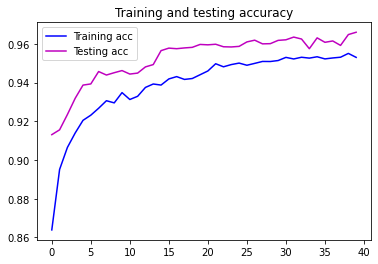

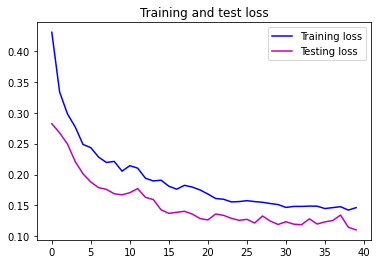

In [74]:
show_acc(history)

In [54]:
predictions = model.predict(X_test)

In [55]:
delta=0.1
predicitions_modified=np.zeros(predictions.shape)
for i in range(predictions.shape[0]):
    for j in range (predictions.shape[1]):
        if(predictions[i][j]>1-delta):
            predicitions_modified[i][j]=1

In [56]:
correct=0
incorrect=0
for i in range (len(predictions)):
    if ((predicitions_modified[i]==y_test[i]).all()):
        correct+=1
    else:
        incorrect+=1
print(correct, " predictions were correct ")
print(incorrect, " predictions were incorrect ")
print(100*correct/(correct+incorrect))

8972  predictions were correct 
1028  predictions were incorrect 
89.72


# Fifth model

In [57]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [58]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [59]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [60]:
model = Sequential()
model.add(Dense(500, activation='relu', input_shape=(28* 28, )))
model.add(Dropout(0.1))
model.add(Dense(400, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation="softmax"))

model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')

In [61]:
history = model.fit(X_train, y_train,  validation_data=(X_test, y_test), batch_size=128, epochs= 40, verbose=2)

Epoch 1/40
469/469 - 8s - loss: 2.1839 - acc: 0.8531 - val_loss: 0.2325 - val_acc: 0.9366
Epoch 2/40
469/469 - 6s - loss: 0.2701 - acc: 0.9274 - val_loss: 0.1600 - val_acc: 0.9533
Epoch 3/40
469/469 - 6s - loss: 0.1850 - acc: 0.9471 - val_loss: 0.1411 - val_acc: 0.9611
Epoch 4/40
469/469 - 6s - loss: 0.1419 - acc: 0.9582 - val_loss: 0.1272 - val_acc: 0.9657
Epoch 5/40
469/469 - 5s - loss: 0.1309 - acc: 0.9613 - val_loss: 0.1240 - val_acc: 0.9664
Epoch 6/40
469/469 - 5s - loss: 0.1164 - acc: 0.9658 - val_loss: 0.1134 - val_acc: 0.9704
Epoch 7/40
469/469 - 5s - loss: 0.1050 - acc: 0.9694 - val_loss: 0.1111 - val_acc: 0.9685
Epoch 8/40
469/469 - 5s - loss: 0.0958 - acc: 0.9717 - val_loss: 0.1099 - val_acc: 0.9699
Epoch 9/40
469/469 - 5s - loss: 0.0992 - acc: 0.9709 - val_loss: 0.1174 - val_acc: 0.9696
Epoch 10/40
469/469 - 5s - loss: 0.0955 - acc: 0.9730 - val_loss: 0.1075 - val_acc: 0.9704
Epoch 11/40
469/469 - 5s - loss: 0.0858 - acc: 0.9751 - val_loss: 0.1216 - val_acc: 0.9709
Epoch 12

In [62]:
import matplotlib.pyplot as plt
def show_acc(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    print("Train accuracy :", history.history['acc'][-1])
    print("Test accuracy  :", history.history['val_acc'][-1])
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'm', label='Testing acc')
    plt.title('Training and testing accuracy')
    plt.legend()

    plt.figure()
    
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'm', label='Testing loss')
    plt.title('Training and test loss')
    plt.legend()

    plt.show()

Train accuracy : 0.9902999997138977
Test accuracy  : 0.9800999760627747


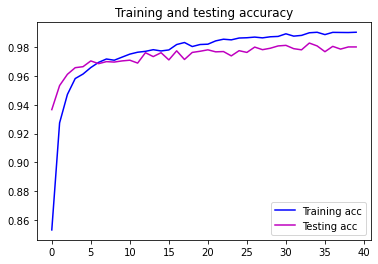

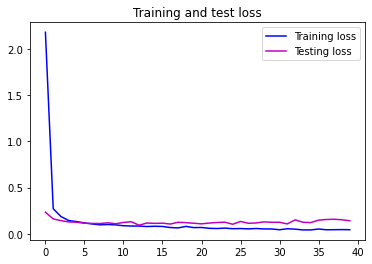

In [63]:
show_acc(history)

In [64]:
predictions = model.predict(X_test)

In [65]:
delta=0.1
predicitions_modified=np.zeros(predictions.shape)
for i in range(predictions.shape[0]):
    for j in range (predictions.shape[1]):
        if(predictions[i][j]>1-delta):
            predicitions_modified[i][j]=1

In [66]:
#correct_predictions=np.nonzero(predictions==y_test)[0]
#incorrect_predictions=np.nonzero(predictions!=y_test)[0]
correct=0
incorrect=0
for i in range (len(predictions)):
    if ((predicitions_modified[i]==y_test[i]).all()):
        correct+=1
    else:
        incorrect+=1
print(correct, " predictions were correct ")
print(incorrect, " predictions were incorrect ")
print(100*correct/(correct+incorrect))

9630  predictions were correct 
370  predictions were incorrect 
96.3


# Six model

In [75]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [76]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_test  =  X_test.reshape((10000, 28, 28, 1))

y_train = np_utils.to_categorical(y_train)
y_test  = np_utils.to_categorical(y_test)

In [77]:
model = Sequential()
model.add( layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)) )
model.add( layers.MaxPooling2D((2, 2)) )
model.add( layers.Conv2D(64, (3, 3), activation='relu') )
model.add( layers.MaxPooling2D((2, 2)) )
model.add( layers.Conv2D(64, (3, 3), activation='relu') )
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')

In [78]:
history = model.fit(X_train, y_train,  validation_data=(X_test, y_test), batch_size=64, epochs= 10, verbose=2)

Epoch 1/10
938/938 - 31s - loss: 0.3302 - acc: 0.9343 - val_loss: 0.0933 - val_acc: 0.9736
Epoch 2/10
938/938 - 32s - loss: 0.0631 - acc: 0.9815 - val_loss: 0.0801 - val_acc: 0.9755
Epoch 3/10
938/938 - 32s - loss: 0.0459 - acc: 0.9859 - val_loss: 0.0479 - val_acc: 0.9841
Epoch 4/10
938/938 - 34s - loss: 0.0395 - acc: 0.9880 - val_loss: 0.0465 - val_acc: 0.9850
Epoch 5/10
938/938 - 30s - loss: 0.0330 - acc: 0.9892 - val_loss: 0.0502 - val_acc: 0.9842
Epoch 6/10
938/938 - 30s - loss: 0.0312 - acc: 0.9898 - val_loss: 0.0536 - val_acc: 0.9855
Epoch 7/10
938/938 - 30s - loss: 0.0278 - acc: 0.9914 - val_loss: 0.0458 - val_acc: 0.9875
Epoch 8/10
938/938 - 29s - loss: 0.0264 - acc: 0.9915 - val_loss: 0.0582 - val_acc: 0.9849
Epoch 9/10
938/938 - 29s - loss: 0.0216 - acc: 0.9931 - val_loss: 0.0577 - val_acc: 0.9853
Epoch 10/10
938/938 - 28s - loss: 0.0209 - acc: 0.9934 - val_loss: 0.0479 - val_acc: 0.9874


Train accuracy : 0.993399977684021
Test accuracy  : 0.9873999953269958


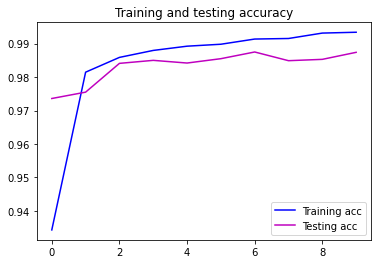

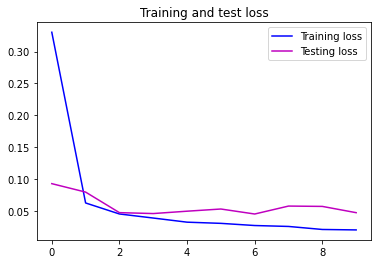

In [79]:
show_acc(history)

In [80]:
predictions = model.predict(X_test)

In [81]:
delta=0.1
predicitions_modified=np.zeros(predictions.shape)
for i in range(predictions.shape[0]):
    for j in range (predictions.shape[1]):
        if(predictions[i][j]>1-delta):
            predicitions_modified[i][j]=1

In [82]:
correct=0
incorrect=0
for i in range (len(predictions)):
    if ((predicitions_modified[i]==y_test[i]).all()):
        correct+=1
    else:
        incorrect+=1
print(correct, " predictions were correct ")
print(incorrect, " predictions were incorrect ")
print(100*correct/(correct+incorrect))

9792  predictions were correct 
208  predictions were incorrect 
97.92


In [83]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0479 - acc: 0.9874


[0.04789121076464653, 0.9873999953269958]

# Using another dataset

In [6]:
import pandas as pd

In [8]:
melset= pd.read_csv("kmnist_classmap.csv")

In [9]:
melset.head

<bound method NDFrame.head of    index codepoint char
0      0    U+304A    お
1      1    U+304D    き
2      2    U+3059    す
3      3    U+3064    つ
4      4    U+306A    な
5      5    U+306F    は
6      6    U+307E    ま
7      7    U+3084    や
8      8    U+308C    れ
9      9    U+3092    を>

In [10]:
X_train = np.load('kmnist-train-imgs.npz')['arr_0']
y_train= np.load('kmnist-train-labels.npz')['arr_0']

X_test= np.load('kmnist-test-imgs.npz')['arr_0']
y_test= np.load('kmnist-test-labels.npz')['arr_0']

In [11]:
print("Shapes of X_train is", X_train.shape)
print("Shapes of y_train is", y_train.shape)

print("Shapes of X_test.shape is", X_test.shape)
print("Shapes of y_test is", y_test.shape)

Shapes of X_train is (60000, 28, 28)
Shapes of y_train is (60000,)
Shapes of X_test.shape is (10000, 28, 28)
Shapes of y_test is (10000,)


In [53]:
print("X_train is between ", X_train.min()," and ",X_train.max(), " // type : ", X_train.dtype)
print("y_train is between ", y_train.min()," and ",y_train.max(), " // type : ", y_train.dtype)

X_train is between  0  and  255  // type :  uint8
y_train is between  0  and  9  // type :  uint8


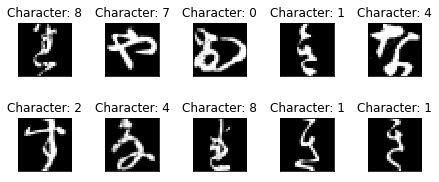

In [54]:
for i in range(10):
    plt.subplot(3, 5, i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Character: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])

In [59]:
#number of each character in the train set
tempo=y_train.tolist()
counter_train=np.zeros((10))
for i in range (10):
    counter_train[i]=tempo.count(i)

print(counter_train)

#number of each character in the test set
tempo=y_test.tolist()
counter_test=np.zeros((10))
for i in range (10):
    counter_test[i]=tempo.count(i)

print(counter_test)

[6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000.]
[1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]


# First model

In [65]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [66]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28* 28, )))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))

model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')

In [67]:
history = model.fit(X_train, y_train,  validation_data=(X_test, y_test), batch_size=128, epochs= 40, verbose=2)

Epoch 1/40
469/469 - 23s - loss: 4.7229 - acc: 0.7400 - val_loss: 1.3355 - val_acc: 0.7038
Epoch 2/40
469/469 - 5s - loss: 0.8291 - acc: 0.8142 - val_loss: 1.0818 - val_acc: 0.7295
Epoch 3/40
469/469 - 6s - loss: 0.6084 - acc: 0.8543 - val_loss: 1.0019 - val_acc: 0.7556
Epoch 4/40
469/469 - 5s - loss: 0.5031 - acc: 0.8785 - val_loss: 0.8872 - val_acc: 0.7791
Epoch 5/40
469/469 - 6s - loss: 0.4447 - acc: 0.8912 - val_loss: 0.8933 - val_acc: 0.7851
Epoch 6/40
469/469 - 7s - loss: 0.3871 - acc: 0.9023 - val_loss: 0.8412 - val_acc: 0.7959
Epoch 7/40
469/469 - 6s - loss: 0.3428 - acc: 0.9094 - val_loss: 0.7126 - val_acc: 0.8104
Epoch 8/40
469/469 - 5s - loss: 0.2921 - acc: 0.9222 - val_loss: 0.6209 - val_acc: 0.8455
Epoch 9/40
469/469 - 5s - loss: 0.2622 - acc: 0.9282 - val_loss: 0.6340 - val_acc: 0.8424
Epoch 10/40
469/469 - 5s - loss: 0.2432 - acc: 0.9342 - val_loss: 0.5906 - val_acc: 0.8501
Epoch 11/40
469/469 - 5s - loss: 0.2347 - acc: 0.9361 - val_loss: 0.5446 - val_acc: 0.8641
Epoch 1

In [68]:
import matplotlib.pyplot as plt
def show_acc(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    print("Train accuracy :", history.history['acc'][-1])
    print("Test accuracy  :", history.history['val_acc'][-1])
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'm', label='Testing acc')
    plt.title('Training and testing accuracy')
    plt.legend()

    plt.figure()
    
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'm', label='Testing loss')
    plt.title('Training and test loss')
    plt.legend()

    plt.show()

Train accuracy : 0.9678999781608582
Test accuracy  : 0.888700008392334


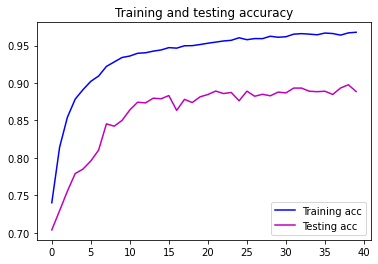

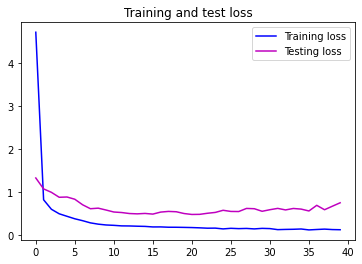

In [69]:
show_acc(history)

In [70]:
predictions = model.predict(X_test)

In [71]:
delta=0.1
predicitions_modified=np.zeros(predictions.shape)
for i in range(predictions.shape[0]):
    for j in range (predictions.shape[1]):
        if(predictions[i][j]>1-delta):
            predicitions_modified[i][j]=1

In [72]:
correct=0
incorrect=0
for i in range (len(predictions)):
    if ((predicitions_modified[i]==y_test[i]).all()):
        correct+=1
    else:
        incorrect+=1
print(correct, " predictions were correct ")
print(incorrect, " predictions were incorrect ")
print(100*correct/(correct+incorrect))

8303  predictions were correct 
1697  predictions were incorrect 
83.03


# Second model

In [73]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28* 28, )))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation="softmax"))

model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')

In [74]:
history = model.fit(X_train, y_train,  validation_data=(X_test, y_test), batch_size=128, epochs= 40, verbose=2)

Epoch 1/40
469/469 - 9s - loss: 4.2144 - acc: 0.8011 - val_loss: 1.4280 - val_acc: 0.7701
Epoch 2/40
469/469 - 8s - loss: 0.5838 - acc: 0.8859 - val_loss: 0.7561 - val_acc: 0.8098
Epoch 3/40
469/469 - 7s - loss: 0.3147 - acc: 0.9196 - val_loss: 0.6947 - val_acc: 0.8338
Epoch 4/40
469/469 - 7s - loss: 0.2510 - acc: 0.9326 - val_loss: 0.6409 - val_acc: 0.8433
Epoch 5/40
469/469 - 7s - loss: 0.2023 - acc: 0.9446 - val_loss: 0.6080 - val_acc: 0.8574
Epoch 6/40
469/469 - 7s - loss: 0.1855 - acc: 0.9477 - val_loss: 0.6123 - val_acc: 0.8648
Epoch 7/40
469/469 - 7s - loss: 0.1766 - acc: 0.9512 - val_loss: 0.5895 - val_acc: 0.8643
Epoch 8/40
469/469 - 7s - loss: 0.1804 - acc: 0.9500 - val_loss: 0.7105 - val_acc: 0.8501
Epoch 9/40
469/469 - 7s - loss: 0.1780 - acc: 0.9511 - val_loss: 0.5945 - val_acc: 0.8679
Epoch 10/40
469/469 - 6s - loss: 0.1669 - acc: 0.9547 - val_loss: 0.5816 - val_acc: 0.8729
Epoch 11/40
469/469 - 6s - loss: 0.1665 - acc: 0.9556 - val_loss: 0.5736 - val_acc: 0.8779
Epoch 12

In [75]:
import matplotlib.pyplot as plt
def show_acc(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    print("Train accuracy :", history.history['acc'][-1])
    print("Test accuracy  :", history.history['val_acc'][-1])
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'm', label='Testing acc')
    plt.title('Training and testing accuracy')
    plt.legend()

    plt.figure()
    
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'm', label='Testing loss')
    plt.title('Training and test loss')
    plt.legend()

    plt.show()

Train accuracy : 0.979033350944519
Test accuracy  : 0.902899980545044


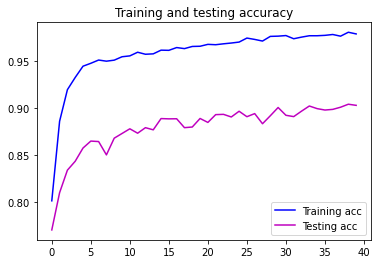

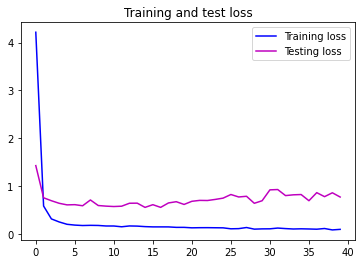

In [76]:
show_acc(history)

In [77]:
predictions = model.predict(X_test)

In [78]:
delta=0.1
predicitions_modified=np.zeros(predictions.shape)
for i in range(predictions.shape[0]):
    for j in range (predictions.shape[1]):
        if(predictions[i][j]>1-delta):
            predicitions_modified[i][j]=1


In [79]:
#correct_predictions=np.nonzero(predictions==y_test)[0]
#incorrect_predictions=np.nonzero(predictions!=y_test)[0]
correct=0
incorrect=0
for i in range (len(predictions)):
    if ((predicitions_modified[i]==y_test[i]).all()):
        correct+=1
    else:
        incorrect+=1
print(correct)
print(incorrect)
print(100*correct/(correct+incorrect))

8606
1394
86.06


# Third model

In [80]:
model = Sequential()
model.add(Dense(450, activation='relu', input_shape=(28* 28, )))
model.add(Dropout(0.1))
model.add(Dense(350, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation="softmax"))

model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')

In [81]:
history = model.fit(X_train, y_train,  validation_data=(X_test, y_test), batch_size=128, epochs= 40, verbose=2)

Epoch 1/40
469/469 - 8s - loss: 4.3308 - acc: 0.7824 - val_loss: 1.0877 - val_acc: 0.7552
Epoch 2/40
469/469 - 6s - loss: 0.5503 - acc: 0.8709 - val_loss: 0.7510 - val_acc: 0.8073
Epoch 3/40
469/469 - 5s - loss: 0.3507 - acc: 0.9055 - val_loss: 0.6483 - val_acc: 0.8319
Epoch 4/40
469/469 - 5s - loss: 0.2665 - acc: 0.9257 - val_loss: 0.6098 - val_acc: 0.8473
Epoch 5/40
469/469 - 5s - loss: 0.2238 - acc: 0.9343 - val_loss: 0.5596 - val_acc: 0.8585
Epoch 6/40
469/469 - 5s - loss: 0.2021 - acc: 0.9410 - val_loss: 0.5438 - val_acc: 0.8672
Epoch 7/40
469/469 - 5s - loss: 0.1874 - acc: 0.9456 - val_loss: 0.5759 - val_acc: 0.8598
Epoch 8/40
469/469 - 4s - loss: 0.1763 - acc: 0.9485 - val_loss: 0.5620 - val_acc: 0.8732
Epoch 9/40
469/469 - 4s - loss: 0.1718 - acc: 0.9509 - val_loss: 0.5131 - val_acc: 0.8720
Epoch 10/40
469/469 - 5s - loss: 0.1700 - acc: 0.9514 - val_loss: 0.5571 - val_acc: 0.8707
Epoch 11/40
469/469 - 5s - loss: 0.1682 - acc: 0.9539 - val_loss: 0.6203 - val_acc: 0.8522
Epoch 12

In [82]:
import matplotlib.pyplot as plt
def show_acc(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    print("Train accuracy :", history.history['acc'][-1])
    print("Test accuracy  :", history.history['val_acc'][-1])
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'm', label='Testing acc')
    plt.title('Training and testing accuracy')
    plt.legend()

    plt.figure()
    
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'm', label='Testing loss')
    plt.title('Training and test loss')
    plt.legend()

    plt.show()

Train accuracy : 0.9778333306312561
Test accuracy  : 0.8973000049591064


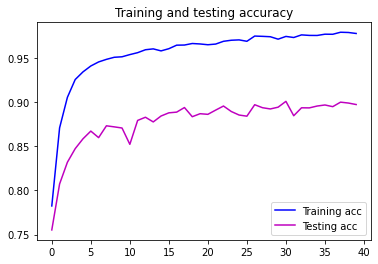

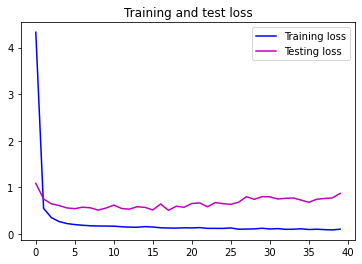

In [83]:
show_acc(history)

In [84]:
predictions = model.predict(X_test)

In [85]:
delta=0.1
predicitions_modified=np.zeros(predictions.shape)
for i in range(predictions.shape[0]):
    for j in range (predictions.shape[1]):
        if(predictions[i][j]>1-delta):
            predicitions_modified[i][j]=1

In [86]:
#correct_predictions=np.nonzero(predictions==y_test)[0]
#incorrect_predictions=np.nonzero(predictions!=y_test)[0]
correct=0
incorrect=0
for i in range (len(predictions)):
    if ((predicitions_modified[i]==y_test[i]).all()):
        correct+=1
    else:
        incorrect+=1
print(correct)
print(incorrect)
print(100*correct/(correct+incorrect))

8503
1497
85.03


# Fourth model

In [87]:
model = Sequential()
model.add(Dense(450, activation='tanh', input_shape=(28* 28, )))
model.add(Dropout(0.1))
model.add(Dense(350, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(10, activation="softmax"))

model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')

In [88]:
history = model.fit(X_train, y_train,  validation_data=(X_test, y_test), batch_size=128, epochs= 40, verbose=2)

Epoch 1/40
469/469 - 6s - loss: 0.7300 - acc: 0.7665 - val_loss: 1.0482 - val_acc: 0.6749
Epoch 2/40
469/469 - 5s - loss: 0.5744 - acc: 0.8152 - val_loss: 0.8453 - val_acc: 0.7298
Epoch 3/40
469/469 - 6s - loss: 0.5046 - acc: 0.8397 - val_loss: 0.7560 - val_acc: 0.7596
Epoch 4/40
469/469 - 5s - loss: 0.4680 - acc: 0.8496 - val_loss: 0.7142 - val_acc: 0.7800
Epoch 5/40
469/469 - 4s - loss: 0.4315 - acc: 0.8641 - val_loss: 0.7444 - val_acc: 0.7595
Epoch 6/40
469/469 - 5s - loss: 0.4257 - acc: 0.8630 - val_loss: 0.7008 - val_acc: 0.7831
Epoch 7/40
469/469 - 5s - loss: 0.4103 - acc: 0.8695 - val_loss: 0.6405 - val_acc: 0.8003
Epoch 8/40
469/469 - 5s - loss: 0.3903 - acc: 0.8765 - val_loss: 0.6360 - val_acc: 0.8052
Epoch 9/40
469/469 - 4s - loss: 0.3709 - acc: 0.8812 - val_loss: 0.6430 - val_acc: 0.7968
Epoch 10/40
469/469 - 5s - loss: 0.3725 - acc: 0.8816 - val_loss: 0.6323 - val_acc: 0.7992
Epoch 11/40
469/469 - 5s - loss: 0.3542 - acc: 0.8870 - val_loss: 0.6072 - val_acc: 0.8081
Epoch 12

In [89]:
import matplotlib.pyplot as plt
def show_acc(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    print("Train accuracy :", history.history['acc'][-1])
    print("Test accuracy  :", history.history['val_acc'][-1])
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'm', label='Testing acc')
    plt.title('Training and testing accuracy')
    plt.legend()

    plt.figure()
    
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'm', label='Testing loss')
    plt.title('Training and test loss')
    plt.legend()

    plt.show()

Train accuracy : 0.9244833588600159
Test accuracy  : 0.8543999791145325


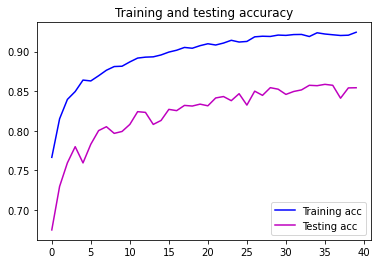

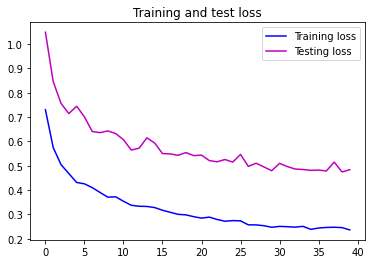

In [90]:
show_acc(history)

In [91]:
predictions = model.predict(X_test)

In [92]:
delta=0.1
predicitions_modified=np.zeros(predictions.shape)
for i in range(predictions.shape[0]):
    for j in range (predictions.shape[1]):
        if(predictions[i][j]>1-delta):
            predicitions_modified[i][j]=1

In [93]:
correct=0
incorrect=0
for i in range (len(predictions)):
    if ((predicitions_modified[i]==y_test[i]).all()):
        correct+=1
    else:
        incorrect+=1
print(correct)
print(incorrect)
print(100*correct/(correct+incorrect))

6809
3191
68.09


# Fifth model

In [94]:
model = Sequential()
model.add(Dense(500, activation='relu', input_shape=(28* 28, )))
model.add(Dropout(0.1))
model.add(Dense(400, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation="softmax"))

model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')

In [95]:
history = model.fit(X_train, y_train,  validation_data=(X_test, y_test), batch_size=128, epochs= 40, verbose=2)

Epoch 1/40
469/469 - 8s - loss: 3.0961 - acc: 0.7487 - val_loss: 0.8599 - val_acc: 0.7393
Epoch 2/40
469/469 - 8s - loss: 0.4714 - acc: 0.8637 - val_loss: 0.6507 - val_acc: 0.8073
Epoch 3/40
469/469 - 7s - loss: 0.3353 - acc: 0.9011 - val_loss: 0.6334 - val_acc: 0.8176
Epoch 4/40
469/469 - 6s - loss: 0.2612 - acc: 0.9220 - val_loss: 0.5345 - val_acc: 0.8497
Epoch 5/40
469/469 - 7s - loss: 0.2239 - acc: 0.9331 - val_loss: 0.4907 - val_acc: 0.8627
Epoch 6/40
469/469 - 6s - loss: 0.1945 - acc: 0.9411 - val_loss: 0.4930 - val_acc: 0.8698
Epoch 7/40
469/469 - 6s - loss: 0.1692 - acc: 0.9498 - val_loss: 0.4472 - val_acc: 0.8819
Epoch 8/40
469/469 - 7s - loss: 0.1581 - acc: 0.9539 - val_loss: 0.4739 - val_acc: 0.8795
Epoch 9/40
469/469 - 7s - loss: 0.1537 - acc: 0.9543 - val_loss: 0.4391 - val_acc: 0.8879
Epoch 10/40
469/469 - 6s - loss: 0.1425 - acc: 0.9581 - val_loss: 0.4940 - val_acc: 0.8779
Epoch 11/40
469/469 - 7s - loss: 0.1362 - acc: 0.9594 - val_loss: 0.4319 - val_acc: 0.8951
Epoch 12

In [36]:
import matplotlib.pyplot as plt
def show_acc(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    print("Train accuracy :", history.history['acc'][-1])
    print("Test accuracy  :", history.history['val_acc'][-1])
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'm', label='Testing acc')
    plt.title('Training and testing accuracy')
    plt.legend()

    plt.figure()
    
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'm', label='Testing loss')
    plt.title('Training and test loss')
    plt.legend()

    plt.show()

Train accuracy : 0.9857500195503235
Test accuracy  : 0.9054999947547913


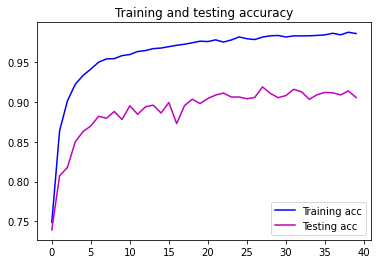

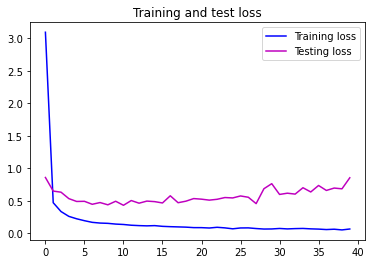

In [97]:
show_acc(history)

In [98]:
predictions = model.predict(X_test)

In [99]:
delta=0.1
predicitions_modified=np.zeros(predictions.shape)
for i in range(predictions.shape[0]):
    for j in range (predictions.shape[1]):
        if(predictions[i][j]>1-delta):
            predicitions_modified[i][j]=1

In [100]:
#correct_predictions=np.nonzero(predictions==y_test)[0]
#incorrect_predictions=np.nonzero(predictions!=y_test)[0]
correct=0
incorrect=0
for i in range (len(predictions)):
    if ((predicitions_modified[i]==y_test[i]).all()):
        correct+=1
    else:
        incorrect+=1
print(correct)
print(incorrect)
print(100*correct/(correct+incorrect))

8671
1329
86.71


# Six model

In [31]:
X_train = np.load('kmnist-train-imgs.npz')['arr_0']
y_train= np.load('kmnist-train-labels.npz')['arr_0']

X_test= np.load('kmnist-test-imgs.npz')['arr_0']
y_test= np.load('kmnist-test-labels.npz')['arr_0']

In [32]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_test  =  X_test.reshape((10000, 28, 28, 1))

y_train = np_utils.to_categorical(y_train)
y_test  = np_utils.to_categorical(y_test)

In [33]:
model = Sequential()
model.add( layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)) )
model.add( layers.MaxPooling2D((2, 2)) )
model.add( layers.Conv2D(64, (3, 3), activation='relu') )
model.add( layers.MaxPooling2D((2, 2)) )
model.add( layers.Conv2D(64, (3, 3), activation='relu') )
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')

In [34]:
history = model.fit(X_train, y_train,  validation_data=(X_test, y_test), batch_size=64, epochs= 10, verbose=2)

Epoch 1/10
938/938 - 61s - loss: 0.4991 - acc: 0.8779 - val_loss: 0.5415 - val_acc: 0.8468
Epoch 2/10
938/938 - 43s - loss: 0.1312 - acc: 0.9595 - val_loss: 0.3197 - val_acc: 0.9128
Epoch 3/10
938/938 - 39s - loss: 0.0841 - acc: 0.9745 - val_loss: 0.3195 - val_acc: 0.9190
Epoch 4/10
938/938 - 41s - loss: 0.0684 - acc: 0.9786 - val_loss: 0.3096 - val_acc: 0.9222
Epoch 5/10
938/938 - 42s - loss: 0.0558 - acc: 0.9824 - val_loss: 0.2606 - val_acc: 0.9352
Epoch 6/10
938/938 - 40s - loss: 0.0462 - acc: 0.9852 - val_loss: 0.2476 - val_acc: 0.9401
Epoch 7/10
938/938 - 42s - loss: 0.0425 - acc: 0.9864 - val_loss: 0.2899 - val_acc: 0.9344
Epoch 8/10
938/938 - 40s - loss: 0.0363 - acc: 0.9890 - val_loss: 0.2675 - val_acc: 0.9381
Epoch 9/10
938/938 - 43s - loss: 0.0309 - acc: 0.9904 - val_loss: 0.3236 - val_acc: 0.9378
Epoch 10/10
938/938 - 43s - loss: 0.0322 - acc: 0.9903 - val_loss: 0.2965 - val_acc: 0.9430


Train accuracy : 0.9903166890144348
Test accuracy  : 0.9430000185966492


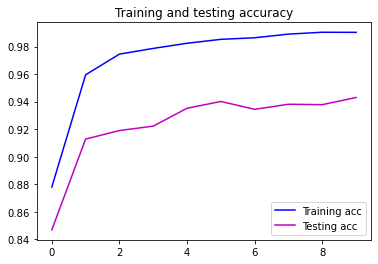

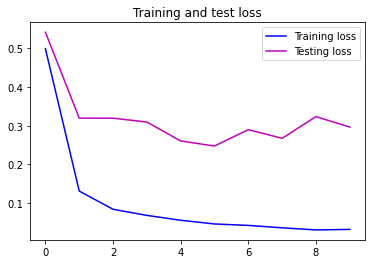

In [40]:
show_acc(history)

In [39]:
predictions = model.predict(X_test)

In [41]:
delta=0.1
predicitions_modified=np.zeros(predictions.shape)
for i in range(predictions.shape[0]):
    for j in range (predictions.shape[1]):
        if(predictions[i][j]>1-delta):
            predicitions_modified[i][j]=1

In [42]:
correct=0
incorrect=0
for i in range (len(predictions)):
    if ((predicitions_modified[i]==y_test[i]).all()):
        correct+=1
    else:
        incorrect+=1
print(correct)
print(incorrect)
print(100*correct/(correct+incorrect))

9078
922
90.78


In [43]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.2965 - acc: 0.9430: 1s - los


[0.29645171761512756, 0.9430000185966492]

In [1]:
from tensorflow.keras.utils import image_dataset_from_directory
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential

from tensorflow.keras import layers

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

In [21]:
size = (64, 64)
# Source : https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory
train_data = image_dataset_from_directory("train",  labels='inferred', image_size = size, label_mode="categorical")

test_data = image_dataset_from_directory("test", labels='inferred', image_size = size,  label_mode="categorical")

Found 5066 files belonging to 10 classes.
Found 2000 files belonging to 10 classes.


In [22]:
classes = train_data.class_names

TypeError: only integer scalar arrays can be converted to a scalar index

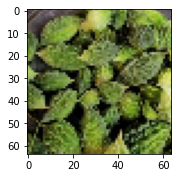

In [60]:
plt.figure(figsize=(15, 25))
class_names = train_data.class_names
for images, labels in train_data.take(1):
    for i in range(10):
        plt.subplot(7, 5, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [63]:
print(classes)

['Bean' 'Bitter_Gourd' 'Bottle_Gourd' 'Brinjal' 'Broccoli' 'Cabbage'
 'Capsicum' 'Carrot' 'Cauliflower' 'Cucumber']


In [64]:
import matplotlib.pyplot as plt
def show_acc(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    print("Train accuracy :", history.history['acc'][-1])
    print("Test accuracy  :", history.history['val_acc'][-1])
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'm', label='Testing acc')
    plt.title('Training and testing accuracy')
    plt.legend()

    plt.figure()
    
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'm', label='Testing loss')
    plt.title('Training and test loss')
    plt.legend()

    plt.show()

### Model 1

In [68]:
model = Sequential()
model.add(layers.InputLayer(input_shape=(size[0], size[1], 3)))
model.add(layers.Rescaling(scale=1./255))

model.add(layers.Flatten())
model.add(layers.Dense(2, activation="tanh"))
model.add(layers.Dense(len(classes), activation='softmax'))

# Compilation du modèle
model.compile(optimizer='adam', metrics=['acc'], loss='categorical_crossentropy')


In [69]:
history = model.fit(train_data, validation_data=test_data, epochs=20, verbose=1, batch_size=500)

Epoch 1/20
159/159 [==============================] - 4s 22ms/step - loss: 2.3634 - acc: 0.1032 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/20
159/159 [==============================] - 6s 36ms/step - loss: 2.3026 - acc: 0.1072 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 3/20
159/159 [==============================] - 4s 25ms/step - loss: 2.3025 - acc: 0.1072 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 4/20
159/159 [==============================] - 5s 29ms/step - loss: 2.3025 - acc: 0.1072 - val_loss: 2.3028 - val_acc: 0.1000
Epoch 5/20
159/159 [==============================] - 5s 27ms/step - loss: 2.3025 - acc: 0.1072 - val_loss: 2.3028 - val_acc: 0.1000
Epoch 6/20
159/159 [==============================] - 6s 37ms/step - loss: 2.3024 - acc: 0.1072 - val_loss: 2.3028 - val_acc: 0.1000
Epoch 7/20
159/159 [==============================] - 6s 36ms/step - loss: 2.3025 - acc: 0.1072 - val_loss: 2.3029 - val_acc: 0.1000
Epoch 8/20
159/159 [==============================] - 4s 25ms/step - 

Train accuracy : 0.10718515515327454
Test accuracy  : 0.10000000149011612


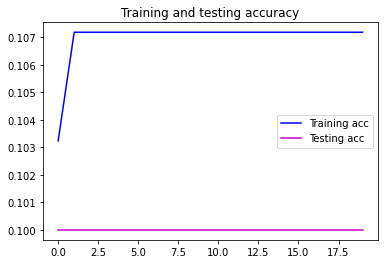

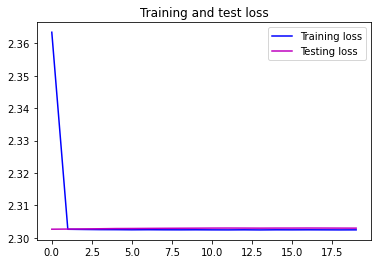

In [70]:
show_acc(history)

### Model 2

In [68]:
model = Sequential()
model.add(layers.InputLayer(input_shape=(size[0], size[1], 3)))
model.add(layers.Rescaling(scale=1./255))

model.add(layers.Flatten())
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(len(classes), activation='softmax'))

# Compilation du modèle
model.compile(optimizer='adam', metrics=['acc'], loss='categorical_crossentropy')


In [69]:
history = model.fit(train_data, validation_data=test_data, epochs=20, verbose=1, batch_size=500)

Epoch 1/20
159/159 [==============================] - 4s 22ms/step - loss: 2.3634 - acc: 0.1032 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/20
159/159 [==============================] - 6s 36ms/step - loss: 2.3026 - acc: 0.1072 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 3/20
159/159 [==============================] - 4s 25ms/step - loss: 2.3025 - acc: 0.1072 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 4/20
159/159 [==============================] - 5s 29ms/step - loss: 2.3025 - acc: 0.1072 - val_loss: 2.3028 - val_acc: 0.1000
Epoch 5/20
159/159 [==============================] - 5s 27ms/step - loss: 2.3025 - acc: 0.1072 - val_loss: 2.3028 - val_acc: 0.1000
Epoch 6/20
159/159 [==============================] - 6s 37ms/step - loss: 2.3024 - acc: 0.1072 - val_loss: 2.3028 - val_acc: 0.1000
Epoch 7/20
159/159 [==============================] - 6s 36ms/step - loss: 2.3025 - acc: 0.1072 - val_loss: 2.3029 - val_acc: 0.1000
Epoch 8/20
159/159 [==============================] - 4s 25ms/step - 

Train accuracy : 0.10718515515327454
Test accuracy  : 0.10000000149011612


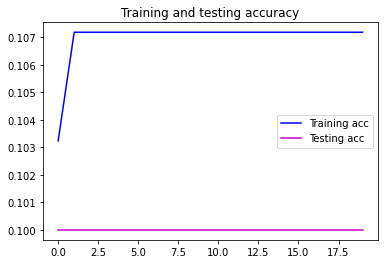

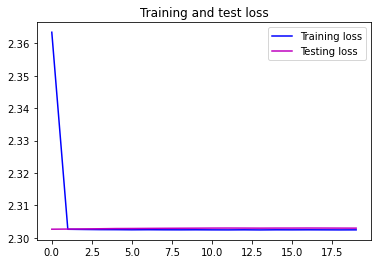

In [70]:
show_acc(history)

### Model 3

In [65]:
model = Sequential()
model.add(layers.InputLayer(input_shape=(size[0], size[1], 3)))
model.add(layers.Rescaling(scale=1./255))

model.add(layers.Flatten())
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(len(classes), activation='softmax'))

# Compilation du modèle
model.compile(optimizer='adam', metrics=['acc'], loss='categorical_crossentropy')


In [66]:
history = model.fit(train_data, validation_data=test_data, epochs=20, verbose=1, batch_size=500)

Epoch 1/20
159/159 [==============================] - 8s 49ms/step - loss: 2.3118 - acc: 0.1074 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/20
159/159 [==============================] - 3s 20ms/step - loss: 2.3026 - acc: 0.1072 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 3/20
159/159 [==============================] - 3s 16ms/step - loss: 2.3025 - acc: 0.1072 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 4/20
159/159 [==============================] - 4s 27ms/step - loss: 2.3025 - acc: 0.1072 - val_loss: 2.3028 - val_acc: 0.1000
Epoch 5/20
159/159 [==============================] - 3s 21ms/step - loss: 2.3025 - acc: 0.1072 - val_loss: 2.3028 - val_acc: 0.1000
Epoch 6/20
159/159 [==============================] - 4s 24ms/step - loss: 2.3025 - acc: 0.1072 - val_loss: 2.3029 - val_acc: 0.1000
Epoch 7/20
159/159 [==============================] - 5s 30ms/step - loss: 2.3024 - acc: 0.1072 - val_loss: 2.3029 - val_acc: 0.1000
Epoch 8/20
159/159 [==============================] - 3s 19ms/step - 

Train accuracy : 0.10718515515327454
Test accuracy  : 0.10000000149011612


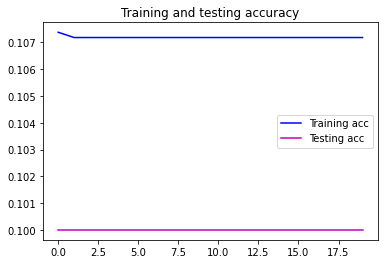

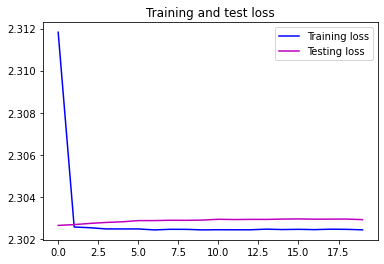

In [67]:
show_acc(history)

### Model 4

In [73]:
model = Sequential()
model.add(layers.InputLayer(input_shape=(size[0], size[1], 3)))
model.add(layers.Rescaling(scale=1./255))

model.add(layers.Flatten())
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dropout(.2))
model.add(layers.Dense(128, activation="tanh"))
model.add(layers.Dense(len(classes), activation='softmax'))

# Compilation du modèle
model.compile(optimizer='adam', metrics=['acc'], loss='categorical_crossentropy')


In [75]:
history = model.fit(train_data, validation_data=test_data, epochs=20, verbose=2, batch_size=500)

Epoch 1/20
159/159 - 3s - loss: 2.3034 - acc: 0.1038 - val_loss: 2.3031 - val_acc: 0.1000 - 3s/epoch - 17ms/step
Epoch 2/20
159/159 - 2s - loss: 2.3033 - acc: 0.1038 - val_loss: 2.3031 - val_acc: 0.1000 - 2s/epoch - 15ms/step
Epoch 3/20
159/159 - 2s - loss: 2.3034 - acc: 0.1034 - val_loss: 2.3031 - val_acc: 0.1000 - 2s/epoch - 16ms/step
Epoch 4/20
159/159 - 3s - loss: 2.3033 - acc: 0.1030 - val_loss: 2.3031 - val_acc: 0.1000 - 3s/epoch - 21ms/step
Epoch 5/20
159/159 - 3s - loss: 2.3036 - acc: 0.1028 - val_loss: 2.3033 - val_acc: 0.1000 - 3s/epoch - 19ms/step
Epoch 6/20
159/159 - 2s - loss: 2.3032 - acc: 0.1066 - val_loss: 2.3032 - val_acc: 0.1000 - 2s/epoch - 15ms/step
Epoch 7/20
159/159 - 3s - loss: 2.3033 - acc: 0.1042 - val_loss: 2.3032 - val_acc: 0.1000 - 3s/epoch - 16ms/step
Epoch 8/20
159/159 - 3s - loss: 2.3034 - acc: 0.1054 - val_loss: 2.3030 - val_acc: 0.1000 - 3s/epoch - 16ms/step
Epoch 9/20
159/159 - 2s - loss: 2.3033 - acc: 0.1040 - val_loss: 2.3031 - val_acc: 0.1000 - 2s/e

Train accuracy : 0.10718515515327454
Test accuracy  : 0.10000000149011612


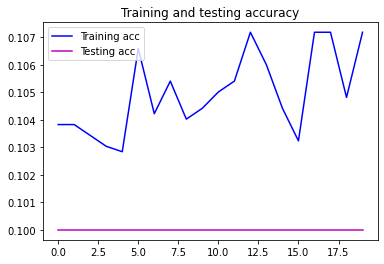

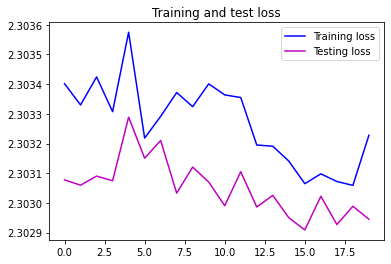

In [76]:
show_acc(history)

### Model 5

In [79]:
model = Sequential()
model.add(layers.InputLayer(input_shape=(size[0], size[1], 3)))
model.add(layers.Rescaling(scale=1./255))

model.add(layers.Conv2D(50, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(20, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(len(classes), activation='softmax'))

# Compilation du modèle
model.compile(optimizer='adam', metrics=['acc'], loss='categorical_crossentropy')


In [80]:
history = model.fit(train_data, validation_data=test_data, epochs=20, verbose=2, batch_size=500)

Epoch 1/20
159/159 - 21s - loss: 1.7428 - acc: 0.3448 - val_loss: 1.3661 - val_acc: 0.4800 - 21s/epoch - 132ms/step
Epoch 2/20
159/159 - 25s - loss: 1.1582 - acc: 0.5894 - val_loss: 1.0602 - val_acc: 0.6205 - 25s/epoch - 155ms/step
Epoch 3/20
159/159 - 26s - loss: 0.9688 - acc: 0.6581 - val_loss: 0.9790 - val_acc: 0.6325 - 26s/epoch - 161ms/step
Epoch 4/20
159/159 - 22s - loss: 0.8340 - acc: 0.7150 - val_loss: 0.8188 - val_acc: 0.7180 - 22s/epoch - 137ms/step
Epoch 5/20
159/159 - 31s - loss: 0.6722 - acc: 0.7720 - val_loss: 0.6670 - val_acc: 0.7625 - 31s/epoch - 194ms/step
Epoch 6/20
159/159 - 24s - loss: 0.5041 - acc: 0.8383 - val_loss: 0.5978 - val_acc: 0.7905 - 24s/epoch - 154ms/step
Epoch 7/20
159/159 - 25s - loss: 0.4349 - acc: 0.8589 - val_loss: 0.5834 - val_acc: 0.8050 - 25s/epoch - 158ms/step
Epoch 8/20
159/159 - 21s - loss: 0.3776 - acc: 0.8808 - val_loss: 0.6550 - val_acc: 0.7695 - 21s/epoch - 129ms/step
Epoch 9/20
159/159 - 22s - loss: 0.3650 - acc: 0.8843 - val_loss: 0.5377

Train accuracy : 0.973351776599884
Test accuracy  : 0.8865000009536743


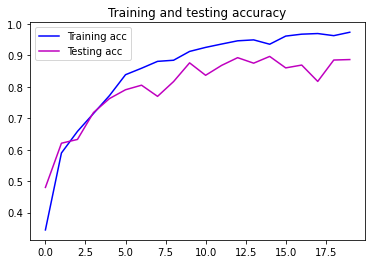

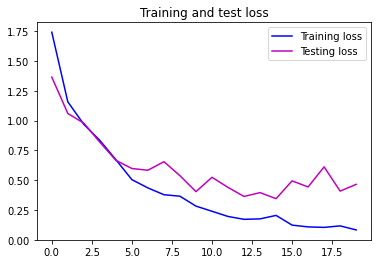

In [81]:
show_acc(history)

### Model 6

In [52]:
model = Sequential()
model.add(layers.InputLayer(input_shape=(size[0], size[1], 3)))
model.add(layers.Rescaling(scale=1./255))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(20, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.7))

model.add(layers.Flatten())
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(len(classes), activation='softmax'))

# Compilation du modèle
model.compile(optimizer='adam', metrics=['acc'], loss='categorical_crossentropy')


In [53]:
history = model.fit(train_data, validation_data=test_data, epochs=20, verbose=1, batch_size=500)

Epoch 1/20
159/159 [==============================] - 19s 113ms/step - loss: 1.7979 - acc: 0.3176 - val_loss: 1.3460 - val_acc: 0.5140
Epoch 2/20
159/159 [==============================] - 20s 123ms/step - loss: 1.2438 - acc: 0.5736 - val_loss: 1.0054 - val_acc: 0.6735
Epoch 3/20
159/159 [==============================] - 16s 99ms/step - loss: 0.9748 - acc: 0.6678 - val_loss: 0.8202 - val_acc: 0.7360
Epoch 4/20
159/159 [==============================] - 16s 97ms/step - loss: 0.8078 - acc: 0.7278 - val_loss: 0.6657 - val_acc: 0.7815
Epoch 5/20
159/159 [==============================] - 16s 99ms/step - loss: 0.6992 - acc: 0.7653 - val_loss: 0.6584 - val_acc: 0.7720
Epoch 6/20
159/159 [==============================] - 15s 97ms/step - loss: 0.6022 - acc: 0.8064 - val_loss: 0.5246 - val_acc: 0.8260
Epoch 7/20
159/159 [==============================] - 16s 101ms/step - loss: 0.5308 - acc: 0.8214 - val_loss: 0.5013 - val_acc: 0.8280
Epoch 8/20
159/159 [==============================] - 16s 9

In [54]:
model.save('model.h5')

Train accuracy : 0.9269640445709229
Test accuracy  : 0.9150000214576721


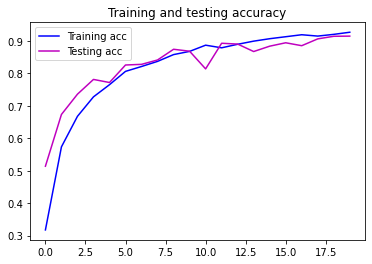

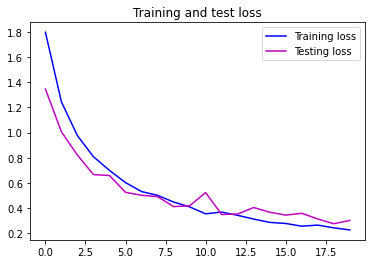

In [56]:
show_acc(history)

In [57]:
val_data = image_dataset_from_directory("validation",  labels='inferred', image_size = size, label_mode="categorical")

Found 2000 files belonging to 10 classes.


In [58]:
model.evaluate(val_data)

63/63 [==============================] - 5s 61ms/step - loss: 0.2571 - acc: 0.9285


[0.2570978105068207, 0.9284999966621399]